# Synthetic data generation
Many libraries and out-of-the-shelf algorithm implementations are widely available, there is still a lack of sufficient data to test them out. Synthetic data generationis a powerful tool we recommend you learn to master as it becomes extremely useful to test and optimizeyour models.

In [376]:
from sklearn.model_selection import train_test_split
import numpy as np

def dataset(f, n_samples=100):
    tr = 20
    X = np.linspace(-tr, tr, n_samples)
    y = f(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.3,random_state=42,shuffle=True)
    # Così li posso plottare (?)
    y_test = y_test[X_test.argsort()]
    X_test.sort()
    
    return X_train.reshape(-1,1), X_test.reshape(-1,1), y_train, y_test

In [25]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
def my_regression_report(y_true, y_pred, x_train):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    adj_r2 = 1 - (1 - r2)*(x_train.shape[0]-1)/(x_train.shape[0]-x_train.shape[1]-1)
    return str(f'R2: {r2:.2f}\nR2 adjusted: {adj_r2:.2f}\nMAE: {mae:.2f}\nMSE: {mse:.2f}')

In [108]:
def inject_noise(y):
    """Add a random noise drawn from a normal distribution."""
    return y + np.random.normal(0, 50, size=y.size)

## f1

In [110]:
f1 = lambda x: x*np.sin(x)+2*x

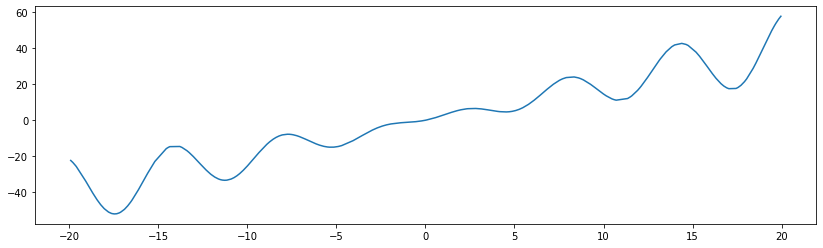

In [377]:
import matplotlib.pyplot as plt

x_train, x_test, y_train, y_test = dataset(f1,1000)

fig, ax = plt.subplots(figsize=(14,4))
ax.plot(x_test[:,0], y_test)

In [378]:
from sklearn.preprocessing import StandardScaler

x_tr = np.hstack((x_train,np.sin(x_train)))
x_te = np.hstack((x_test,np.sin(x_test)))

# Data noramlization
z_scaler = StandardScaler()
x_train = z_scaler.fit_transform(x_train)
x_test = z_scaler.transform(x_test)

# Data noramlization
z_scaler = StandardScaler()
x_tr = z_scaler.fit_transform(x_tr)
x_te = z_scaler.transform(x_te)

##### Linear regression

In [379]:
from sklearn.linear_model import LinearRegression

### Linear regression
lreg = LinearRegression(fit_intercept=True)
lreg.fit(x_train, y_train)
y_p = lreg.predict(x_test)

print('Linear regression:')
print(my_regression_report(y_test,y_p,x_train))

Linear regression:
R2: 0.90
R2 adjusted: 0.90
MAE: 6.39
MSE: 66.90


##### Polynomial regression

In [380]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

reg_pipeline = make_pipeline(PolynomialFeatures(4), LinearRegression())

# Polinomial regression
reg_pipeline.fit(x_train, y_train)
y_p = reg_pipeline.predict(x_test)

print(my_regression_report(y_test,y_p,x_train))

R2: 0.90
R2 adjusted: 0.90
MAE: 6.35
MSE: 66.47


##### Polynomial regression - Ridge

In [381]:
from sklearn.linear_model import Ridge

reg_pipeline = make_pipeline(PolynomialFeatures(4), Ridge(alpha=0.5))

# Polinomial regression
reg_pipeline.fit(x_train, y_train)
y_p = reg_pipeline.predict(x_test)

print(my_regression_report(y_test,y_p,x_train))

R2: 0.90
R2 adjusted: 0.90
MAE: 6.35
MSE: 66.48


##### Polynomial regression - Lasso

In [382]:
from sklearn.linear_model import Lasso

reg_pipeline = make_pipeline(PolynomialFeatures(4), Lasso(alpha=0.5))

# Polinomial regression
reg_pipeline.fit(x_train, y_train)
y_p = reg_pipeline.predict(x_test)

print(my_regression_report(y_test,y_p,x_train))

R2: 0.89
R2 adjusted: 0.89
MAE: 6.42
MSE: 68.01


##### Polynomial regression + sin(.)
Osservando che c'è un comportamento oscillatorio nella funzione, initroduco un termine sin(.)  
Questo mi garantisce performances migliori di Lasso e Ridge

In [383]:
# Usano x_tr e x_te !!!
reg_pipeline = make_pipeline(PolynomialFeatures(4), LinearRegression())

# Polinomial regression
reg_pipeline.fit(x_tr, y_train)
y_p = reg_pipeline.predict(x_te)

print(my_regression_report(y_test,y_p,x_tr))

R2: 1.00
R2 adjusted: 1.00
MAE: 0.00
MSE: 0.00


### Other regressors
Hanno bisogno che i dati vengano normalizzati!!

In [384]:
x_train = x_tr
x_test = x_te

In [385]:
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor


# MLPR (neural net)
reg = make_pipeline(MLPRegressor(random_state=17, max_iter=100000))
reg_pipeline.fit(x_train, y_train)
y_p = reg_pipeline.predict(x_test)

print('Multi-layer Perceptron regressor:')
print(my_regression_report(y_test,y_p,x_train))
print()

# SVR
reg_pipeline = make_pipeline(SVR(gamma='auto'))
reg_pipeline.fit(x_train, y_train)
y_p = reg_pipeline.predict(x_test)

print('Epsilon-Support Vector Regression:')
print(my_regression_report(y_test,y_p,x_train))
print()

# Random forest
reg_pipeline = make_pipeline(RandomForestRegressor(n_estimators=1000, random_state=17))
reg_pipeline.fit(x_train, y_train)
y_p = reg_pipeline.predict(x_test)

print('RandomForest Regression:')
print(my_regression_report(y_test,y_p,x_train))
print()

Multi-layer Perceptron regressor:
R2: 1.00
R2 adjusted: 1.00
MAE: 0.00
MSE: 0.00

Epsilon-Support Vector Regression:
R2: 0.98
R2 adjusted: 0.98
MAE: 1.65
MSE: 12.97

RandomForest Regression:
R2: 1.00
R2 adjusted: 1.00
MAE: 0.33
MSE: 0.25



## f1 + noise

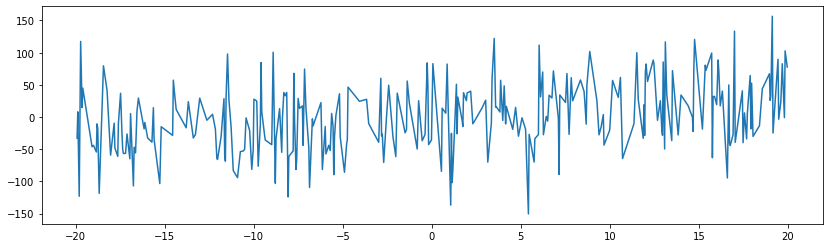

In [386]:
import matplotlib.pyplot as plt

x_train, x_test, y_train, y_test = dataset(f1,1000)

y_train = inject_noise(y_train)
y_test = inject_noise(y_test)

fig, ax = plt.subplots(figsize=(14,4))
ax.plot(x_test[:,0], y_test)

In [387]:
from sklearn.preprocessing import StandardScaler

x_tr = np.hstack((x_train,np.sin(x_train)))
x_te = np.hstack((x_test,np.sin(x_test)))

# Data noramlization
z_scaler = StandardScaler()
x_train = z_scaler.fit_transform(x_train)
x_test = z_scaler.transform(x_test)

# Data noramlization
z_scaler = StandardScaler()
x_tr = z_scaler.fit_transform(x_tr)
x_te = z_scaler.transform(x_te)

In [388]:
# Linear regression
lreg = LinearRegression(fit_intercept=True)
lreg.fit(x_train, y_train)
y_p = lreg.predict(x_test)

print('Linear regression:')
print(my_regression_report(y_test,y_p,x_train))
print()


# Polinomial regression
reg_pipeline = make_pipeline(PolynomialFeatures(4), LinearRegression())
reg_pipeline.fit(x_train, y_train)
y_p = reg_pipeline.predict(x_test)

print('Polynomial regression:')
print(my_regression_report(y_test,y_p,x_train))
print()


# Ridge regression
reg_pipeline = make_pipeline(PolynomialFeatures(4), Ridge(alpha=0.5))
reg_pipeline.fit(x_train, y_train)
y_p = reg_pipeline.predict(x_test)

print('Ridge regression:')
print(my_regression_report(y_test,y_p,x_train))
print()


# Lasso regression
reg_pipeline = make_pipeline(PolynomialFeatures(4), Lasso(alpha=0.5))
reg_pipeline.fit(x_train, y_train)
y_p = reg_pipeline.predict(x_test)

print('Lasso regression:')
print(my_regression_report(y_test,y_p,x_train))
print()


# Polynomial + trigonometric
reg_pipeline = make_pipeline(PolynomialFeatures(4), LinearRegression())

reg_pipeline.fit(x_tr, y_train)
y_p = reg_pipeline.predict(x_te)

print('Poly + trig regression:')
print(my_regression_report(y_test,y_p,x_tr))
print()

x_train = x_tr
x_test= x_te

# MLPR (neural net)
reg_pipeline = make_pipeline(MLPRegressor(random_state=17, max_iter=100000))
reg_pipeline.fit(x_train, y_train)
y_p = reg_pipeline.predict(x_test)

print('Multi-layer Perceptron regressor:')
print(my_regression_report(y_test,y_p,x_train))
print()

# SVR
reg_pipeline = make_pipeline(SVR(gamma='auto',max_iter=100000))
reg_pipeline.fit(x_train, y_train)
y_p = reg_pipeline.predict(x_test)

print('Epsilon-Support Vector Regression:')
print(my_regression_report(y_test,y_p,x_train))
print()

# Random forest
reg_pipeline = make_pipeline(RandomForestRegressor(n_estimators=1000))
reg_pipeline.fit(x_train, y_train)
y_p = reg_pipeline.predict(x_test)

print('RandomForest Regression:')
print(my_regression_report(y_test,y_p,x_train))
print()

Linear regression:
R2: 0.11
R2 adjusted: 0.11
MAE: 40.51
MSE: 2537.89

Polynomial regression:
R2: 0.11
R2 adjusted: 0.11
MAE: 40.57
MSE: 2537.63

Ridge regression:
R2: 0.11
R2 adjusted: 0.11
MAE: 40.57
MSE: 2537.61

Lasso regression:
R2: 0.11
R2 adjusted: 0.11
MAE: 40.49
MSE: 2533.19

Poly + trig regression:
R2: 0.12
R2 adjusted: 0.12
MAE: 40.17
MSE: 2522.22

Multi-layer Perceptron regressor:
R2: 0.13
R2 adjusted: 0.13
MAE: 39.80
MSE: 2485.39

Epsilon-Support Vector Regression:
R2: 0.14
R2 adjusted: 0.14
MAE: 39.85
MSE: 2462.43

RandomForest Regression:
R2: -0.10
R2 adjusted: -0.10
MAE: 45.16
MSE: 3136.97



Il migliore è la linear adesso

## f2

In [389]:
f2 = lambda x: 10*np.sin(x)+x**2

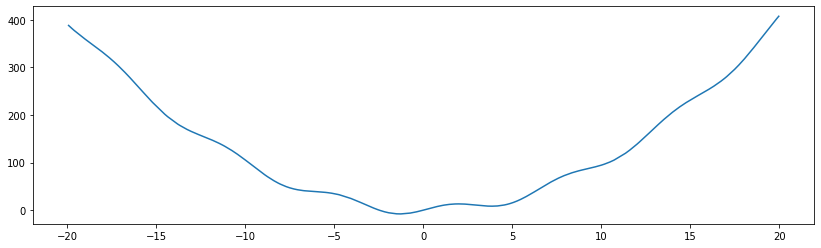

In [420]:
import matplotlib.pyplot as plt

x_train, x_test, y_train, y_test = dataset(f2,1000)

fig, ax = plt.subplots(figsize=(14,4))
ax.plot(x_test[:,0], y_test)

In [391]:
from sklearn.preprocessing import StandardScaler

x_tr = np.hstack((x_train,np.sin(x_train)))
x_te = np.hstack((x_test,np.sin(x_test)))

# Data noramlization
z_scaler = StandardScaler()
x_train = z_scaler.fit_transform(x_train)
x_test = z_scaler.transform(x_test)

# Data noramlization
z_scaler = StandardScaler()
x_tr = z_scaler.fit_transform(x_tr)
x_te = z_scaler.transform(x_te)

In [392]:
# Linear regression
lreg = LinearRegression(fit_intercept=True)
lreg.fit(x_train, y_train)
y_p = lreg.predict(x_test)

print('Linear regression:')
print(my_regression_report(y_test,y_p,x_train))
print()


# Polinomial regression
reg_pipeline = make_pipeline(PolynomialFeatures(4), LinearRegression())
reg_pipeline.fit(x_train, y_train)
y_p = reg_pipeline.predict(x_test)

print('Polynomial regression:')
print(my_regression_report(y_test,y_p,x_train))
print()


# Ridge regression
reg_pipeline = make_pipeline(PolynomialFeatures(4), Ridge(alpha=0.5))
reg_pipeline.fit(x_train, y_train)
y_p = reg_pipeline.predict(x_test)

print('Ridge regression:')
print(my_regression_report(y_test,y_p,x_train))
print()


# Lasso regression
reg_pipeline = make_pipeline(PolynomialFeatures(4), Lasso(alpha=0.5))
reg_pipeline.fit(x_train, y_train)
y_p = reg_pipeline.predict(x_test)

print('Lasso regression:')
print(my_regression_report(y_test,y_p,x_train))
print()


# Polynomial + trigonometric
reg_pipeline = make_pipeline(PolynomialFeatures(4), LinearRegression())

reg_pipeline.fit(x_tr, y_train)
y_p = reg_pipeline.predict(x_te)

print('Poly + trig regression:')
print(my_regression_report(y_test,y_p,x_tr))
print()

# MLPR (neural net)
reg_pipeline = make_pipeline(MLPRegressor(random_state=17, max_iter=100000))
reg_pipeline.fit(x_train, y_train)
y_p = reg_pipeline.predict(x_test)

print('Multi-layer Perceptron regressor:')
print(my_regression_report(y_test,y_p,x_train))
print()

# SVR
reg_pipeline = make_pipeline(SVR(gamma='auto'))
reg_pipeline.fit(x_train, y_train)
y_p = reg_pipeline.predict(x_test)

print('Epsilon-Support Vector Regression:')
print(my_regression_report(y_test,y_p,x_train))
print()

# Random forest
reg_pipeline = make_pipeline(RandomForestRegressor(n_estimators=1000, random_state=17))
reg_pipeline.fit(x_train, y_train)
y_p = reg_pipeline.predict(x_test)

print('RandomForest Regression:')
print(my_regression_report(y_test,y_p,x_train))
print()

Linear regression:
R2: -0.00
R2 adjusted: -0.00
MAE: 106.19
MSE: 15225.35

Polynomial regression:
R2: 1.00
R2 adjusted: 1.00
MAE: 6.32
MSE: 49.18

Ridge regression:
R2: 1.00
R2 adjusted: 1.00
MAE: 6.33
MSE: 49.41

Lasso regression:
R2: 1.00
R2 adjusted: 1.00
MAE: 6.41
MSE: 50.92

Poly + trig regression:
R2: 1.00
R2 adjusted: 1.00
MAE: 0.00
MSE: 0.00

Multi-layer Perceptron regressor:
R2: 1.00
R2 adjusted: 1.00
MAE: 4.89
MSE: 35.92

Epsilon-Support Vector Regression:
R2: 0.77
R2 adjusted: 0.77
MAE: 35.93
MSE: 3505.21

RandomForest Regression:
R2: 1.00
R2 adjusted: 1.00
MAE: 0.52
MSE: 0.53



## f2 + noise

In [393]:
f2 = lambda x: 10*np.sin(x)+x**2

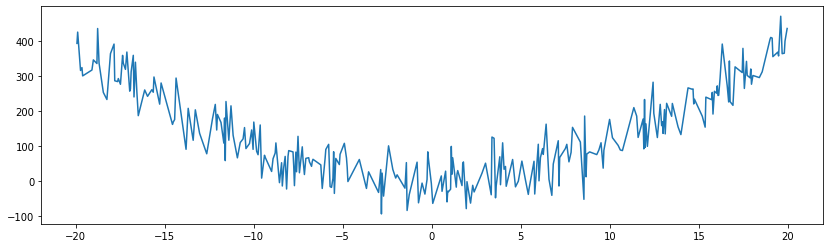

In [419]:
import matplotlib.pyplot as plt

x_train, x_test, y_train, y_test = dataset(f2,1000)

y_train = inject_noise(y_train)
y_test = inject_noise(y_test)

fig, ax = plt.subplots(figsize=(14,4))
ax.plot(x_test[:,0], y_test)

In [395]:
from sklearn.preprocessing import StandardScaler

x_tr = np.hstack((x_train,np.sin(x_train)))
x_te = np.hstack((x_test,np.sin(x_test)))

# Data noramlization
z_scaler = StandardScaler()
x_train = z_scaler.fit_transform(x_train)
x_test = z_scaler.transform(x_test)

# Data noramlization
z_scaler = StandardScaler()
x_tr = z_scaler.fit_transform(x_tr)
x_te = z_scaler.transform(x_te)

In [396]:
# Linear regression
lreg = LinearRegression(fit_intercept=True)
lreg.fit(x_train, y_train)
y_p = lreg.predict(x_test)

print('Linear regression:')
print(my_regression_report(y_test,y_p,x_train))
print()


# Polinomial regression
reg_pipeline = make_pipeline(PolynomialFeatures(4), LinearRegression())
reg_pipeline.fit(x_train, y_train)
y_p = reg_pipeline.predict(x_test)

print('Polynomial regression:')
print(my_regression_report(y_test,y_p,x_train))
print()


# Ridge regression
reg_pipeline = make_pipeline(PolynomialFeatures(4), Ridge(alpha=0.5))
reg_pipeline.fit(x_train, y_train)
y_p = reg_pipeline.predict(x_test)

print('Ridge regression:')
print(my_regression_report(y_test,y_p,x_train))
print()


# Lasso regression
reg_pipeline = make_pipeline(PolynomialFeatures(4), Lasso(alpha=0.5))
reg_pipeline.fit(x_train, y_train)
y_p = reg_pipeline.predict(x_test)

print('Lasso regression:')
print(my_regression_report(y_test,y_p,x_train))
print()


# Polynomial + trigonometric
reg_pipeline = make_pipeline(PolynomialFeatures(4), LinearRegression())

reg_pipeline.fit(x_tr, y_train)
y_p = reg_pipeline.predict(x_te)

print('Poly + trig regression:')
print(my_regression_report(y_test,y_p,x_tr))
print()

# MLPR (neural net)
reg_pipeline = make_pipeline(MLPRegressor(random_state=17, max_iter=100000))
reg_pipeline.fit(x_train, y_train)
y_p = reg_pipeline.predict(x_test)

print('Multi-layer Perceptron regressor:')
print(my_regression_report(y_test,y_p,x_train))
print()

# SVR
reg_pipeline = make_pipeline(SVR(gamma='auto'))
reg_pipeline.fit(x_train, y_train)
y_p = reg_pipeline.predict(x_test)

print('Epsilon-Support Vector Regression:')
print(my_regression_report(y_test,y_p,x_train))
print()

# Random forest
reg_pipeline = make_pipeline(RandomForestRegressor(n_estimators=1000, random_state=17))
reg_pipeline.fit(x_train, y_train)
y_p = reg_pipeline.predict(x_test)

print('RandomForest Regression:')
print(my_regression_report(y_test,y_p,x_train))
print()

Linear regression:
R2: -0.00
R2 adjusted: -0.00
MAE: 115.27
MSE: 19090.02

Polynomial regression:
R2: 0.87
R2 adjusted: 0.87
MAE: 39.41
MSE: 2438.94

Ridge regression:
R2: 0.87
R2 adjusted: 0.87
MAE: 39.39
MSE: 2440.23

Lasso regression:
R2: 0.87
R2 adjusted: 0.87
MAE: 39.37
MSE: 2445.65

Poly + trig regression:
R2: 0.87
R2 adjusted: 0.87
MAE: 40.25
MSE: 2446.76

Multi-layer Perceptron regressor:
R2: 0.87
R2 adjusted: 0.87
MAE: 39.84
MSE: 2440.81

Epsilon-Support Vector Regression:
R2: 0.61
R2 adjusted: 0.61
MAE: 66.16
MSE: 7495.92

RandomForest Regression:
R2: 0.82
R2 adjusted: 0.82
MAE: 48.17
MSE: 3494.61



## f3

In [397]:
f3 = lambda x: np.sign(x)*(x**2+300) + 20*np.sin(x)

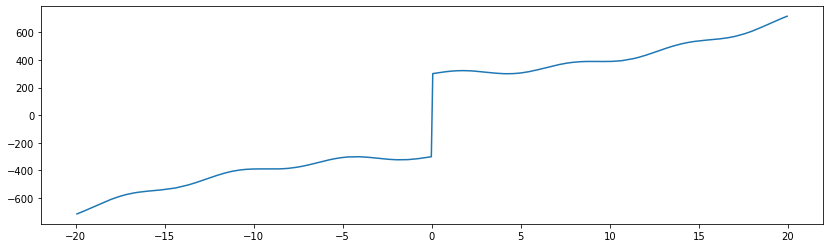

In [405]:
import matplotlib.pyplot as plt

x_train, x_test, y_train, y_test = dataset(f3,1000)

fig, ax = plt.subplots(figsize=(14,4))
ax.plot(x_test[:,0], y_test)

In [406]:
x_train.shape

(700, 1)

In [407]:
from sklearn.preprocessing import StandardScaler

x_tr = np.hstack((x_train,np.sin(x_train)))
x_te = np.hstack((x_test,np.sin(x_test)))

# Data noramlization
z_scaler = StandardScaler()
x_train = z_scaler.fit_transform(x_train)
x_test = z_scaler.transform(x_test)

# Data noramlization
z_scaler = StandardScaler()
x_tr = z_scaler.fit_transform(x_tr)
x_te = z_scaler.transform(x_te)

In [408]:
# Linear regression
lreg = LinearRegression(fit_intercept=True)
lreg.fit(x_train, y_train)
y_p = lreg.predict(x_test)

print('Linear regression:')
print(my_regression_report(y_test,y_p,x_train))
print()


# Polinomial regression
reg_pipeline = make_pipeline(PolynomialFeatures(4), LinearRegression())
reg_pipeline.fit(x_train, y_train)
y_p = reg_pipeline.predict(x_test)

print('Polynomial regression:')
print(my_regression_report(y_test,y_p,x_train))
print()


# Ridge regression
reg_pipeline = make_pipeline(PolynomialFeatures(4), Ridge(alpha=0.5))
reg_pipeline.fit(x_train, y_train)
y_p = reg_pipeline.predict(x_test)

print('Ridge regression:')
print(my_regression_report(y_test,y_p,x_train))
print()


# Lasso regression
reg_pipeline = make_pipeline(PolynomialFeatures(4), Lasso(alpha=0.5))
reg_pipeline.fit(x_train, y_train)
y_p = reg_pipeline.predict(x_test)

print('Lasso regression:')
print(my_regression_report(y_test,y_p,x_train))
print()


# Polynomial + trigonometric
reg_pipeline = make_pipeline(PolynomialFeatures(4), LinearRegression())

reg_pipeline.fit(x_tr, y_train)
y_p = reg_pipeline.predict(x_te)

print('Poly + trig regression:')
print(my_regression_report(y_test,y_p,x_tr))
print()

# MLPR (neural net)
reg_pipeline = make_pipeline( MLPRegressor(random_state=17, max_iter=100000))
reg_pipeline.fit(x_train, y_train)
y_p = reg_pipeline.predict(x_test)

print('Multi-layer Perceptron regressor:')
print(my_regression_report(y_test,y_p,x_train))
print()

# SVR
reg_pipeline = make_pipeline(SVR(gamma='auto'))
reg_pipeline.fit(x_train, y_train)
y_p = reg_pipeline.predict(x_test)

print('Epsilon-Support Vector Regression:')
print(my_regression_report(y_test,y_p,x_train))
print()

# Random forest
reg_pipeline = make_pipeline(RandomForestRegressor(n_estimators=1000, random_state=17))
reg_pipeline.fit(x_train, y_train)
y_p = reg_pipeline.predict(x_test)

print('RandomForest Regression:')
print(my_regression_report(y_test,y_p,x_train))
print()

Linear regression:
R2: 0.93
R2 adjusted: 0.93
MAE: 91.97
MSE: 15274.10

Polynomial regression:
R2: 0.94
R2 adjusted: 0.94
MAE: 79.01
MSE: 12248.03

Ridge regression:
R2: 0.94
R2 adjusted: 0.94
MAE: 78.91
MSE: 12246.11

Lasso regression:
R2: 0.94
R2 adjusted: 0.94
MAE: 78.73
MSE: 12200.96

Poly + trig regression:
R2: 0.95
R2 adjusted: 0.95
MAE: 76.54
MSE: 10426.38

Multi-layer Perceptron regressor:
R2: 0.95
R2 adjusted: 0.95
MAE: 63.64
MSE: 9575.31

Epsilon-Support Vector Regression:
R2: 0.63
R2 adjusted: 0.63
MAE: 253.21
MSE: 75546.17

RandomForest Regression:
R2: 1.00
R2 adjusted: 1.00
MAE: 1.18
MSE: 76.33



## f3 + noise

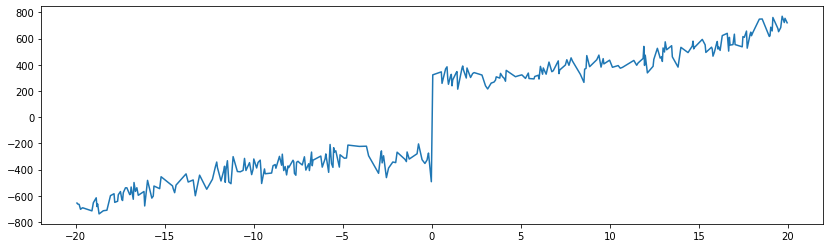

In [414]:
import matplotlib.pyplot as plt

x_train, x_test, y_train, y_test = dataset(f3,1000)

y_train = inject_noise(y_train)
y_test = inject_noise(y_test)

fig, ax = plt.subplots(figsize=(14,4))
ax.plot(x_test[:,0], y_test)

In [415]:
from sklearn.preprocessing import StandardScaler

x_tr = np.hstack((x_train,np.sin(x_train)))
x_te = np.hstack((x_test,np.sin(x_test)))

# Data noramlization
z_scaler = StandardScaler()
x_train = z_scaler.fit_transform(x_train)
x_test = z_scaler.transform(x_test)

# Data noramlization
z_scaler = StandardScaler()
x_tr = z_scaler.fit_transform(x_tr)
x_te = z_scaler.transform(x_te)

In [416]:
# Linear regression
lreg = LinearRegression(fit_intercept=True)
lreg.fit(x_train, y_train)
y_p = lreg.predict(x_test)

print('Linear regression:')
print(my_regression_report(y_test,y_p,x_train))
print()


# Polinomial regression
reg_pipeline = make_pipeline(PolynomialFeatures(4), LinearRegression())
reg_pipeline.fit(x_train, y_train)
y_p = reg_pipeline.predict(x_test)

print('Polynomial regression:')
print(my_regression_report(y_test,y_p,x_train))
print()


# Ridge regression
reg_pipeline = make_pipeline(PolynomialFeatures(4), Ridge(alpha=0.5))
reg_pipeline.fit(x_train, y_train)
y_p = reg_pipeline.predict(x_test)

print('Ridge regression:')
print(my_regression_report(y_test,y_p,x_train))
print()


# Lasso regression
reg_pipeline = make_pipeline(PolynomialFeatures(4), Lasso(alpha=0.5))
reg_pipeline.fit(x_train, y_train)
y_p = reg_pipeline.predict(x_test)

print('Lasso regression:')
print(my_regression_report(y_test,y_p,x_train))
print()


# Polynomial + trigonometric
x_tr = np.hstack((x_train,np.sin(x_train)))
x_te = np.hstack((x_test,np.sin(x_test)))
reg_pipeline = make_pipeline(PolynomialFeatures(4), LinearRegression())

reg_pipeline.fit(x_tr, y_train)
y_p = reg_pipeline.predict(x_te)

print('Poly + trig regression:')
print(my_regression_report(y_test,y_p,x_tr))
print()

# MLPR (neural net)
reg_pipeline = make_pipeline(MLPRegressor(random_state=17, max_iter=100000))
reg_pipeline.fit(x_train, y_train)
y_p = reg_pipeline.predict(x_test)

print('Multi-layer Perceptron regressor:')
print(my_regression_report(y_test,y_p,x_train))
print()

# SVR
reg_pipeline = make_pipeline(SVR(gamma='auto'))
reg_pipeline.fit(x_train, y_train)
y_p = reg_pipeline.predict(x_test)

print('Epsilon-Support Vector Regression:')
print(my_regression_report(y_test,y_p,x_train))
print()

# Random forest
reg_pipeline = make_pipeline(RandomForestRegressor(n_estimators=1000, random_state=17))
reg_pipeline.fit(x_train, y_train)
y_p = reg_pipeline.predict(x_test)

print('RandomForest Regression:')
print(my_regression_report(y_test,y_p,x_train))
print()

Linear regression:
R2: 0.92
R2 adjusted: 0.92
MAE: 100.12
MSE: 17544.82

Polynomial regression:
R2: 0.93
R2 adjusted: 0.93
MAE: 89.79
MSE: 15032.29

Ridge regression:
R2: 0.93
R2 adjusted: 0.93
MAE: 89.67
MSE: 15025.28

Lasso regression:
R2: 0.93
R2 adjusted: 0.93
MAE: 89.35
MSE: 14958.30

Poly + trig regression:
R2: 0.96
R2 adjusted: 0.96
MAE: 64.63
MSE: 8274.31

Multi-layer Perceptron regressor:
R2: 0.94
R2 adjusted: 0.94
MAE: 76.34
MSE: 12175.86

Epsilon-Support Vector Regression:
R2: 0.62
R2 adjusted: 0.62
MAE: 255.25
MSE: 80183.68

RandomForest Regression:
R2: 0.98
R2 adjusted: 0.98
MAE: 49.13
MSE: 3973.33



## Osservazioni
1. SVR ha bisogno che i dati vengano normalizzati e ha bisogno di un train set molto grande. Infatti è sempre sotto agli altri
2. SVR, MLP e random forest non hanno bisogno di PolynomialFeatures() siccome non sono lineari. Tutti sembrano giovare della normalizzazione dei dati che, attenzione, **va fatta dopo qualsiasi trasformazione del dataset**.
3. MLP sembra essere stato il più flessibile, seguito dalle random forest, che sono davvero poco sensibili al rumore.
4. Attenzione ai possibili `random_state` degli algoritmi! Come le random forest ad esempio.
5. In tutti questi casi per migliorare le performances si può usare cross validation.

# Multivariate synthetic dataset

In [616]:
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=2000, n_informative=500, n_features=50, noise=30, random_state=42)

In [617]:
# Train test split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=.25, shuffle=True, random_state=17)

In [618]:
# Normalization
z_scaler = StandardScaler()
x_train = z_scaler.fit_transform(x_train)
x_test = z_scaler.transform(x_test)

##### Regression & cross validation

In [619]:
# Linear regression
lreg = LinearRegression(fit_intercept=True)
lreg.fit(x_train, y_train)
y_p = lreg.predict(x_test)

print('Linear regression:')
print(my_regression_report(y_test,y_p,x_train))
print()

Linear regression:
R2: 0.99
R2 adjusted: 0.99
MAE: 24.28
MSE: 932.79



In [620]:
lreg.coef_

array([65.48133901, 44.76463089, 54.86507157, 65.29402925, 38.50470715,
        0.69256054,  1.97633306, 31.75279127, 76.44044599, 50.67743003,
       84.19039102, 15.53952864, 57.81631121, 79.25360506, 78.92347181,
       35.97566728, 87.23553476, 75.52961262, 96.61540127, 94.81929688,
        9.30783004, 18.87832486, 68.20640766, 87.18686328, 21.38824618,
       51.12454304, 36.77298986, 55.29854975, 14.5101307 , 51.72590734,
       84.75443123, 44.38630158, 25.42270889, 19.72544154, 10.67199596,
       47.45620496, 96.28034664, 30.36788957, -0.55194174, 13.3157013 ,
       46.59156295, 31.46778321, 25.91753781, 67.31910349, 50.8425319 ,
       81.8035834 , 84.8420911 ,  4.09753962, 49.03401354, 54.1762225 ])

Quando il numero di **informative** aumenta, aumentano anche i coefficienti della linear regression. Quando il numero id informative supera il numero di features il coefficienti della linear regression rimangono pressochè uguali.

In [622]:
from sklearn.model_selection import GridSearchCV

# Polinomial regression + cross validation

# Pipeline
reg_pipeline = make_pipeline(PolynomialFeatures(), LinearRegression())

# Parameters grid
param_grid = {
    'polynomialfeatures__degree': range(3)
}

# Gridsearch
gs = GridSearchCV(reg_pipeline, param_grid, scoring='r2', cv=3, n_jobs=-1)
gs.fit(x_train, y_train)
print(gs.best_params_)
print()

# Best estimator
est = gs.best_estimator_
est.fit(x_train, y_train)
y_p = est.predict(x_test)

print('Polynomial regression:')
print(my_regression_report(y_test,y_p,x_train))
print()

{'polynomialfeatures__degree': 1}

Polynomial regression:
R2: 0.99
R2 adjusted: 0.99
MAE: 24.28
MSE: 932.80



In [623]:
# Ridge regression
# Pipeline
reg_pipeline = make_pipeline(PolynomialFeatures(), Ridge())

# Parameters grid
param_grid = {
    'polynomialfeatures__degree': range(3),
    'ridge__alpha': [0.1, 0.2, 0.5, 0.8, 1],
    'ridge__fit_intercept': [True, False]

}

# Gridsearch
gs = GridSearchCV(reg_pipeline, param_grid, scoring='r2', cv=3, n_jobs=-1)
gs.fit(x_train, y_train)
print(gs.best_params_)
print()

# Best estimator
est = gs.best_estimator_
est.fit(x_train, y_train)
y_p = est.predict(x_test)

print('Ridge regression:')
print(my_regression_report(y_test,y_p,x_train))
print()

{'polynomialfeatures__degree': 1, 'ridge__alpha': 1, 'ridge__fit_intercept': True}

Ridge regression:
R2: 0.99
R2 adjusted: 0.99
MAE: 24.26
MSE: 932.24



In [624]:
# Lasso regression
# Pipeline
reg_pipeline = make_pipeline(PolynomialFeatures(), Lasso())

# Parameters grid
param_grid = {
    'polynomialfeatures__degree': range(3),
    'lasso__alpha': [0.1, 0.2, 0.5, 0.8, 1],
    'lasso__fit_intercept': [True, False]

}

# Gridsearch
gs = GridSearchCV(reg_pipeline, param_grid, scoring='r2', cv=3, n_jobs=-1)
gs.fit(x_train, y_train)
print(gs.best_params_)
print()

# Best estimator
est = gs.best_estimator_
est.fit(x_train, y_train)
y_p = est.predict(x_test)

print('Lasso regression:')
print(my_regression_report(y_test,y_p,x_train))
print()

{'lasso__alpha': 0.1, 'lasso__fit_intercept': True, 'polynomialfeatures__degree': 1}

Lasso regression:
R2: 0.99
R2 adjusted: 0.99
MAE: 24.25
MSE: 932.30



In [625]:
# MLPR (neural net)
reg = MLPRegressor(random_state=17, max_iter=100000)
# Parameters grid
param_grid = {
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'solver': ['lbfgs', 'sgd', 'adam']
    #'learning_rate': ['constant', 'invscaling', 'adaptive']
}

# Gridsearch
gs = GridSearchCV(reg, param_grid, scoring='r2', cv=3, n_jobs=-1)
gs.fit(x_train, y_train)
print(gs.best_params_)
print()

# Best estimator
est = gs.best_estimator_
est.fit(x_train, y_train)
y_p = est.predict(x_test)

print('Multi-layer Perceptron regressor:')
print(my_regression_report(y_test,y_p,x_train))
print()

{'activation': 'identity', 'solver': 'lbfgs'}

Multi-layer Perceptron regressor:
R2: 0.99
R2 adjusted: 0.99
MAE: 24.28
MSE: 932.79



In [627]:
# SVR
reg = SVR(gamma='auto')
# Parameters grid
param_grid = {
    'kernel': ['rbf', 'linear', 'poly', 'sigmoid'],
    'C': [1, 3, 5, 7, 9],
    'shrinking':[True, False],
    'epsilon':[0.1,0.3,0.5,0.7]
}

# Gridsearch
gs = GridSearchCV(reg, param_grid, scoring='r2', cv=3, n_jobs=-1)
gs.fit(x_train, y_train)
print(gs.best_params_)
print()

# Best estimator
est = gs.best_estimator_
est.fit(x_train, y_train)
y_p = est.predict(x_test)

print('Epsilon-Support Vector Regression:')
print(my_regression_report(y_test,y_p,x_train))
print()

{'C': 5, 'epsilon': 0.5, 'kernel': 'linear', 'shrinking': True}

Epsilon-Support Vector Regression:
R2: 0.99
R2 adjusted: 0.99
MAE: 24.59
MSE: 947.25



In [ ]:
# Random forest
reg = RandomForestRegressor(n_estimators=100, random_state=17)
# Parameters grid
param_grid = {
    'criterion': ['mae', 'mse'],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 4, 8]
}

# Gridsearch
gs = GridSearchCV(reg, param_grid, scoring='r2', cv=3, n_jobs=-1)
gs.fit(x_train, y_train)
print(gs.best_params_)
print()

# Best estimator
est = RandomForestRegressor(n_estimators=500, random_state=17, **gs.best_params_)
est.fit(x_train, y_train)
y_p = est.predict(x_test)

print('RandomForest Regression:')
print(my_regression_report(y_test,y_p,x_train))
print()

# WWII Temperatures dataset

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('weatherww2/Summary of Weather.csv')

C:\Users\mette\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (7,8,18,25) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


##### Pulizia delle colonne con multiple type

In [3]:
# DtypeWarning: Columns (7,8,18,25) have mixed types. 
bad_cols = [7,8,18,25]
df[df.columns[bad_cols]].info()    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 4 columns):
Snowfall       117877 non-null object
PoorWeather    34237 non-null object
SNF            117877 non-null object
TSHDSBRSGF     34237 non-null object
dtypes: object(4)
memory usage: 3.6+ MB


In [4]:
# Ci sono delle stringe nelle colonne che impediscono il casting a nuerico. COnverto queste stringhe to NaN
for c in bad_cols:
    df[df.columns[c]] = pd.to_numeric(df[df.columns[c]], errors='coerce')

# Risultato
df[df.columns[bad_cols]].info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 4 columns):
Snowfall       117833 non-null float64
PoorWeather    33553 non-null float64
SNF            117833 non-null float64
TSHDSBRSGF     33553 non-null float64
dtypes: float64(4)
memory usage: 3.6 MB


##### Esplorazione del dataset

##### 1. Check dei tipi & missing values
Verifico che il casting sia andato a buon fine e correggo eventuali errori e dati inconsistenti (es stringa in una colonna di float).

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 31 columns):
STA            119040 non-null int64
Date           119040 non-null object
Precip         119040 non-null object
WindGustSpd    532 non-null float64
MaxTemp        119040 non-null float64
MinTemp        119040 non-null float64
MeanTemp       119040 non-null float64
Snowfall       117833 non-null float64
PoorWeather    33553 non-null float64
YR             119040 non-null int64
MO             119040 non-null int64
DA             119040 non-null int64
PRCP           117108 non-null object
DR             533 non-null float64
SPD            532 non-null float64
MAX            118566 non-null float64
MIN            118572 non-null float64
MEA            118542 non-null float64
SNF            117833 non-null float64
SND            5563 non-null float64
FT             0 non-null float64
FB             0 non-null float64
FTI            0 non-null float64
ITH            0 non-null floa

In [6]:
# campi che ora sono ancora 'object'
df[['Precip', 'PRCP']]

,Precip,PRCP
0,1.016,0.04
1,0,0
2,2.54,0.1
3,2.54,0.1
4,0,0
...,...,...
119035,0,0
119036,9.906,0.39
119037,0,0
119038,0,0


In [7]:
# Conversione di altri campi che ora sono ancora 'object'
to_conv = ['Precip', 'PRCP']
for field in to_conv:
    df[field] = pd.to_numeric(df[field], errors='coerce')

# COnversione date
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 31 columns):
STA            119040 non-null int64
Date           119040 non-null datetime64[ns]
Precip         102287 non-null float64
WindGustSpd    532 non-null float64
MaxTemp        119040 non-null float64
MinTemp        119040 non-null float64
MeanTemp       119040 non-null float64
Snowfall       117833 non-null float64
PoorWeather    33553 non-null float64
YR             119040 non-null int64
MO             119040 non-null int64
DA             119040 non-null int64
PRCP           100355 non-null float64
DR             533 non-null float64
SPD            532 non-null float64
MAX            118566 non-null float64
MIN            118572 non-null float64
MEA            118542 non-null float64
SNF            117833 non-null float64
SND            5563 non-null float64
FT             0 non-null float64
FB             0 non-null float64
FTI            0 non-null float64
ITH            0 non

##### 2. Check dei valori
Verifico che ciascun campo d'interesse abbia un intervallo di valori valido, escludendo gli outliers.

In [9]:
df.describe()

# Notare il max di PoorWeather. è sicuramente un valore non valido

,STA,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,MO,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
count,119040.000000,102287.000000,532.000000,119040.000000,119040.000000,119040.000000,117833.000000,3.355300e+04,119040.000000,119040.000000,...,0.0,0.0,0.0,525.000000,3.355300e+04,0.0,0.0,0.0,0.0,0.0
mean,29659.435795,3.753917,37.774534,27.045111,17.789511,22.411631,0.245544,4.027963e+06,43.805284,6.726016,...,NaN,NaN,NaN,12.085333,4.027963e+06,NaN,NaN,NaN,NaN,NaN
std,20953.209402,11.566633,10.297808,8.717817,8.334572,8.297982,2.626600,6.333825e+07,1.136718,3.425561,...,NaN,NaN,NaN,5.731328,6.333825e+07,NaN,NaN,NaN,NaN,NaN
min,10001.000000,0.000000,18.520000,-33.333333,-38.333333,-35.555556,0.000000,0.000000e+00,40.000000,1.000000,...,NaN,NaN,NaN,0.000000,0.000000e+00,NaN,NaN,NaN,NaN,NaN
25%,11801.000000,0.000000,29.632000,25.555556,15.000000,20.555556,0.000000,1.000000e+00,43.000000,4.000000,...,NaN,NaN,NaN,8.500000,1.000000e+00,NaN,NaN,NaN,NaN,NaN
50%,22508.000000,0.000000,37.040000,29.444444,21.111111,25.555556,0.000000,1.000000e+00,44.000000,7.000000,...,NaN,NaN,NaN,11.600000,1.000000e+00,NaN,NaN,NaN,NaN,NaN
75%,33501.000000,1.524000,43.059000,31.666667,23.333333,27.222222,0.000000,1.000000e+00,45.000000,10.000000,...,NaN,NaN,NaN,15.000000,1.000000e+00,NaN,NaN,NaN,NaN,NaN
max,82506.000000,307.340000,75.932000,50.000000,34.444444,40.000000,86.360000,1.010001e+09,45.000000,12.000000,...,NaN,NaN,NaN,23.900000,1.010001e+09,NaN,NaN,NaN,NaN,NaN


##### 3. Statistiche e dati d'interesse

In [10]:
# 10 sensori con più dati
group = df.groupby('STA')
best_stations = group.count().sum(axis=1).sort_values(ascending=False).head(10)
best_stations

STA
10701    31204
22508    30784
22502    29772
22504    29226
10803    25328
11610    24129
11601    24037
10502    22773
16405    22680
32601    21851
dtype: int64

In [11]:
# Mean weather conditions for the top stations
df[df['STA'].isin(best_stations.index)].groupby('STA').mean()

# Si nota che le condizioni medie variano a seconda della stazione, 
# dunque è necessaria una normalizzazione se lavoriamo con più stazioni.

,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,MO,DA,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
STA,,,,,,,,,,,,,,,,,,,,,
10502,7.608138,NaN,30.877901,21.409445,26.138034,0.000000,1.000000e+00,43.309758,6.925344,15.768828,...,NaN,NaN,NaN,NaN,1.000000e+00,NaN,NaN,NaN,NaN,NaN
10701,6.086071,NaN,31.707094,23.189423,27.437325,0.000000,1.000000e+00,42.501144,6.509382,15.737300,...,NaN,NaN,NaN,NaN,1.000000e+00,NaN,NaN,NaN,NaN,NaN
10803,3.289317,NaN,31.074921,23.003810,27.046349,0.000000,1.000000e+00,43.066857,6.676571,15.780000,...,NaN,NaN,NaN,NaN,1.000000e+00,NaN,NaN,NaN,NaN,NaN
11601,5.318149,NaN,30.034982,24.296204,27.187587,0.000000,1.000000e+00,43.277431,6.845387,15.800499,...,NaN,NaN,NaN,NaN,1.000000e+00,NaN,NaN,NaN,NaN,NaN
11610,7.762408,NaN,30.102527,21.961646,26.023912,0.000000,1.000000e+00,43.239730,6.854077,15.812385,...,NaN,NaN,NaN,NaN,1.000000e+00,NaN,NaN,NaN,NaN,NaN
16405,2.615910,NaN,5.624401,-2.633237,1.499520,3.500043,1.000000e+00,43.252158,6.850801,15.789766,...,NaN,NaN,NaN,NaN,1.000000e+00,NaN,NaN,NaN,NaN,NaN
22502,1.829743,NaN,27.664552,19.176468,23.420510,0.000000,1.000000e+00,42.535747,6.593779,15.715877,...,NaN,NaN,NaN,NaN,1.000000e+00,NaN,NaN,NaN,NaN,NaN
22504,1.523676,NaN,28.205855,20.472668,24.341097,0.000000,1.000000e+00,42.516997,6.512748,15.699717,...,NaN,NaN,NaN,NaN,1.000000e+00,NaN,NaN,NaN,NaN,NaN
22508,2.968356,NaN,26.175233,18.411395,22.296229,0.000000,1.000000e+00,42.499544,6.521898,15.732664,...,NaN,NaN,NaN,NaN,1.000000e+00,NaN,NaN,NaN,NaN,NaN


## Estrazione del dataset utilizzato

In [12]:
ds = df[df['STA'] == 22508]
ds = ds[['Date', 'MaxTemp', 'MinTemp', 'MeanTemp']]

##### 1. Check dei tipi & missing values
Verifico che il casting sia andato a buon fine e correggo eventuali errori e dati inconsistenti (es stringa in una colonna di float).

In [13]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2192 entries, 57877 to 60068
Data columns (total 4 columns):
Date        2192 non-null datetime64[ns]
MaxTemp     2192 non-null float64
MinTemp     2192 non-null float64
MeanTemp    2192 non-null float64
dtypes: datetime64[ns](1), float64(3)
memory usage: 85.6 KB


##### 2. Check dei valori
Verifico che ciascun campo d'interesse abbia un intervallo di valori valido, escludendo gli outliers.

In [14]:
# Verifico che le temperature siano in un range di valori sensato
ds.describe()

,MaxTemp,MinTemp,MeanTemp
count,2192.000000,2192.000000,2192.000000
mean,26.175233,18.411395,22.296229
std,2.094557,2.072139,1.799486
min,17.777778,11.666667,15.555556
25%,25.000000,17.222222,21.111111
50%,26.666667,18.888889,22.222222
75%,27.777778,20.000000,23.333333
max,31.666667,22.777778,26.111111


##### 3. Statistiche e dati d'interesse

##### Mean Temp

In [15]:
mean_temp = ds['MeanTemp'].values
date = ds['Date'].values

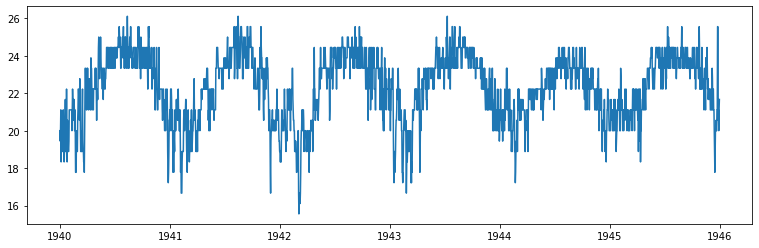

In [17]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(13,4))
ax.plot(date,mean_temp)

## Preprocessing

### UPDATE: *ho capito male l'esercizio e ho fatto un'altra cosa. Anche se inutile per questo esercizio, quello che c'è sotto è un abbozzo sensato di un approccio a un problema di regressione. L'unico difetto è lo scheletro delle regressioni che dev'essere fatto con una pipeline se voglio normalizzare!*.

##### Vai sotto fino al Preprocessing 3

---

Il tipo datetime non può essere usato negli algoritmi di regressione, pertanto dev'essere convertito in un formato valido.

---
---
The best way is to explode the date into a set of categorical features encoded in boolean form using the 1-of-K encoding (e.g. as done by DictVectorizer). Here are some features that can be extracted from a date:

    hour of the day (24 boolean features)
    day of the week (7 boolean features)
    day of the month (up to 31 boolean features)
    month of the year (12 boolean features)
    year (as many boolean features as they are different years in your dataset) ...

That should make it possible to identify linear dependencies on periodic events on typical human life cycles.

Additionally you can also extract the date a single float: convert each date as the number of days since the min date of your training set and divide by the difference of the number of days between the max date and the number of days of the min date. That numerical feature should make it possible to identify long term trends between the output of the event date: e.g. a linear slope in a regression problem to better predict evolution on forth-coming years that cannot be encoded with the boolean categorical variable for the year feature.

---

You have two options. You can convert the date to an ordinal i.e. an integer representing the number of days since year 1 day 1. You can do this by a datetime.date's toordinal function.

Alternatively, you can turn the dates into categorical variables using sklearn's OneHotEncoder. What it does is create a new variable for each distinct date. So instead of something like column date with values ['2013-04-01', '2013-05-01'], you will have two columns, date_2013_04_01 with values [1, 0] and date_2013_05_01 with values [0, 1].

I would recommend using the toordinal approach if you have many different dates, and the one hot encoder if the number of distinct dates is small (let's say up to 10 - 100, depending on the size of your data and what sort of relation the date has with the output variable).


Fonte: https://stackoverflow.com/questions/16453644/regression-with-date-variable-using-scikit-learn

---
---

In questo caso preferisco l'approccio della trasformazione di una data nella differenza in giorni dalla prima:
- Mi interessa un long-term trend.
- Ho un gran numero di date che farebbe aumentare di molto le dimensioni del dataset

Questo preproc diventa necessario qualora avessi delle date mancanti nel dataset

In [19]:
(np.datetime64('2020-02-01') - np.datetime64('2020-01-01')) / np.timedelta64(1, 'D')

31.0

In [20]:
(np.datetime64('today') - np.datetime64('1997-07-17')) / np.timedelta64(1, 'D')

8212.0

In [21]:
# Preproc 
time = np.array([(date[i]-date[0])/np.timedelta64(1, 'D') for i in range(date.size)])

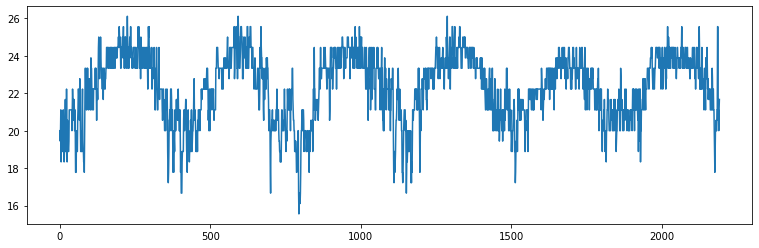

In [22]:
fig, ax = plt.subplots(figsize=(13,4))
ax.plot(time,mean_temp)

## Classic k-fold Cross Validation Does Not Work For Time Series Data

The goal of time series forecasting is to make accurate predictions about the future.

The fast and powerful methods that we rely on in machine learning, such as using train-test splits and k-fold cross validation, do not work in the case of time series data. This is because they ignore the temporal components inherent in the problem.

### k-fold cross validation with `TimeSeriesSplit` of sklearn
param: `n_splits`  

**Test set size (const.) =** `n_samples // (n_splits + 1)`  (importante)  
**Train set size =** `i * n_samples // (n_splits + 1) + n_samples % (n_splits + 1)`  
A ogni iterazione il **train set** aumenta di un numero di elementi pari alla lunghezza del **test set**.

`n_samples` è la lunghezza della time serie.  

vedi: https://scikit-learn.org/stable/modules/cross_validation.html#time-series-split

In [22]:
from sklearn.model_selection import TimeSeriesSplit

x = np.array([
    [0, 1],
    [2, 3],
    [4, 5],
    [6, 7]
])

#x.shape[0] = 4
#n_splits=x.shape[0]-1 --> test set sempre di 1
ts = TimeSeriesSplit(n_splits=x.shape[0]-1)

for train_ids, test_ids in ts.split(x):
    print(f'TRAIN indices: {train_ids}; TEST indices: {test_ids}')

TRAIN indices: [0]; TEST indices: [1]
TRAIN indices: [0 1]; TEST indices: [2]
TRAIN indices: [0 1 2]; TEST indices: [3]


## Train (validation + train) - test split

In [113]:
split_date = '1945'
x_train, x_test = time[date <= np.datetime64(split_date)], time[date > np.datetime64(split_date)]
y_train, y_test = mean_temp[date <= np.datetime64(split_date)], mean_temp[date > np.datetime64(split_date)]

x_train, x_test = x_train.reshape(-1,1), x_test.reshape(-1,1)

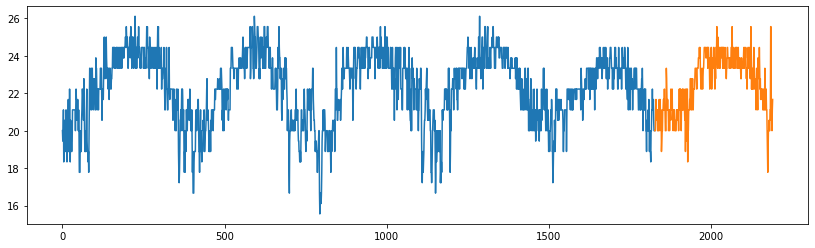

In [114]:
fig, ax = plt.subplots(figsize=(14,4))
ax.plot(x_train[:,0], y_train)
ax.plot(x_test[:,0],y_test)
plt.plot();

## Definizione dei k-fold della cross validation
`n_splits` è settato in modo tale da avere sempre il test set di dimensione 1.  

**Attenzione!** in questo modo non posso più usare lo scoring `r2` perchè ha bisogno di almeno 2 elementi nel test set!  
Devo usare ad esempio: `neg_mean_absolute_error`, `neg_mean_squared_error`

In [118]:
# Cross validation folds
tss = TimeSeriesSplit(n_splits=x_train.shape[0]-1)

## Regression

In [119]:
from sklearn.model_selection import cross_val_score

# Test preventivo
cross_val_score(lreg, x_train, y_train, cv=tss, scoring='neg_mean_squared_error', )

array([-0.30864198, -1.23456792, -1.68038409, ..., -5.60508374,
       -5.581134  , -5.5572811 ])

In [120]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
# Linear regression
lreg = LinearRegression()
param_grid = {
    'fit_intercept': [True, False]
}

# Gridsearch
gs = GridSearchCV(lreg, param_grid, cv=tss, scoring='neg_mean_squared_error', n_jobs=-1, iid=True)
gs.fit(x_train, y_train)
print(gs.best_score_)
print(gs.best_params_)
print()

#Best model
est = gs.best_estimator_
est.fit(x_train, y_train)
y_p = est.predict(x_test)

print('Linear regression:')
print(my_regression_report(y_test,y_p,x_train))
print()

-3.4354856647690473
{'fit_intercept': True}

Linear regression:
R2: -0.00
R2 adjusted: -0.00
MAE: 1.32
MSE: 2.35



In [121]:
# Polinomial regression + cross validation
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Pipeline
reg_pipeline = make_pipeline(PolynomialFeatures(), LinearRegression())

# Parameters grid
param_grid = {
    'polynomialfeatures__degree': range(3),
    'linearregression__fit_intercept': [True, False]
}

# Gridsearch
gs = GridSearchCV(reg_pipeline, param_grid, scoring='neg_mean_squared_error', cv=tss, n_jobs=-1, iid=True)
gs.fit(x_train, y_train)
print(gs.best_params_)
print()

# Best estimator
est = gs.best_estimator_
est.fit(x_train, y_train)
y_p = est.predict(x_test)

print('Polynomial regression:')
print(my_regression_report(y_test,y_p,x_train))
print()

{'linearregression__fit_intercept': True, 'polynomialfeatures__degree': 0}

Polynomial regression:
R2: -0.03
R2 adjusted: -0.03
MAE: 1.33
MSE: 2.41



In [122]:
from sklearn.linear_model import Ridge
# Ridge regression
# Pipeline
reg_pipeline = make_pipeline(PolynomialFeatures(), Ridge())

# Parameters grid
param_grid = {
    'polynomialfeatures__degree': range(3),
    'ridge__alpha': [0.1, 0.2, 0.5, 1, 10],
    'ridge__fit_intercept': [True, False]

}

# Gridsearch
gs = GridSearchCV(reg_pipeline, param_grid, scoring='neg_mean_squared_error', cv=tss, n_jobs=-1, iid=True)
gs.fit(x_train, y_train)
print(gs.best_params_)
print()

# Best estimator
est = gs.best_estimator_
est.fit(x_train, y_train)
y_p = est.predict(x_test)

print('Ridge regression:')
print(my_regression_report(y_test,y_p,x_train))
print()

{'polynomialfeatures__degree': 0, 'ridge__alpha': 0.1, 'ridge__fit_intercept': True}

Ridge regression:
R2: -0.03
R2 adjusted: -0.03
MAE: 1.33
MSE: 2.41



In [123]:
from sklearn.linear_model import RidgeCV
# Nota: non ha senso fare la cross validation di ridgeCV perchè sarebbe come farla 2 volte
ridgecv = RidgeCV(cv=tss, scoring='neg_mean_squared_error')
ridgecv.fit(x_train,y_train)
y_p = ridgecv.predict(x_test)

print(ridgecv.alpha_)
print()
print('RidgeCV regression:')
print(my_regression_report(y_test,y_p,x_train))
print()

10.0

RidgeCV regression:
R2: -0.00
R2 adjusted: -0.01
MAE: 1.32
MSE: 2.35



In [124]:
from sklearn.linear_model import Lasso
# Lasso regression
# Pipeline
reg_pipeline = make_pipeline(PolynomialFeatures(), Lasso())

# Parameters grid
param_grid = {
    'polynomialfeatures__degree': range(3),
    'lasso__alpha': [0.1, 0.2, 0.5, 1, 10],
    'lasso__fit_intercept': [True, False]

}

# Gridsearch
gs = GridSearchCV(reg_pipeline, param_grid, scoring='neg_mean_squared_error', cv=tss, n_jobs=-1, iid=True)
gs.fit(x_train, y_train)
print(gs.best_params_)
print()

# Best estimator
est = gs.best_estimator_
est.fit(x_train, y_train)
y_p = est.predict(x_test)

print('Lasso regression:')
print(my_regression_report(y_test,y_p,x_train))
print()

{'lasso__alpha': 0.1, 'lasso__fit_intercept': True, 'polynomialfeatures__degree': 0}

Lasso regression:
R2: -0.03
R2 adjusted: -0.03
MAE: 1.33
MSE: 2.41



## Other regressors

## Definizione dei k-fold della cross validation
`n_splits` è settato in modo tale da avere k-fold più grandi:.

In [92]:
# Cross validation folds
tss = TimeSeriesSplit(n_splits=5)

In [94]:
from sklearn.neural_network import MLPRegressor
# MLPR (neural net)
reg = MLPRegressor(random_state=17, max_iter=100000)
# Parameters grid
param_grid = {
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'solver': ['lbfgs', 'sgd', 'adam'],
    'learning_rate': ['constant', 'invscaling', 'adaptive']
}

# Gridsearch
gs = GridSearchCV(reg, param_grid, scoring='neg_mean_squared_error', cv=tss, n_jobs=-1, iid=True)
gs.fit(x_train, y_train)
print(gs.best_params_)
print()

# Best estimator
est = gs.best_estimator_
est.fit(x_train, y_train)
y_p = est.predict(x_test)

print('Multi-layer Perceptron regressor:')
print(my_regression_report(y_test,y_p,x_train))
print()

{'activation': 'tanh', 'learning_rate': 'constant', 'solver': 'adam'}

Multi-layer Perceptron regressor:
R2: -0.03
R2 adjusted: -0.03
MAE: 1.33
MSE: 2.42



In [103]:
from sklearn.svm import SVR
# SVR
reg = SVR(gamma='auto')
# Parameters grid
param_grid = {
    'kernel': ['rbf', 'linear', 'poly', 'sigmoid'],
    'C': [0.5, 1, 3, 5, 7, 9],
    'shrinking':[True, False],
    'epsilon':[0.1,0.3,0.5,0.7]
}

# Gridsearch
gs = GridSearchCV(reg, param_grid, scoring='neg_mean_squared_error', cv=tss, n_jobs=-1, iid=True)
gs.fit(x_train, y_train)
print(gs.best_params_)
print()

# Best estimator
est = gs.best_estimator_
est.fit(x_train, y_train)
y_p = est.predict(x_test)

print('Epsilon-Support Vector Regression:')
print(my_regression_report(y_test,y_p,x_train))
print()

{'C': 1, 'epsilon': 0.3, 'kernel': 'poly', 'shrinking': True}

Epsilon-Support Vector Regression:
R2: -0.00
R2 adjusted: -0.00
MAE: 1.31
MSE: 2.34



In [104]:
from sklearn.ensemble import RandomForestRegressor
# Random forest
reg = RandomForestRegressor(n_estimators=100, random_state=17)
# Parameters grid
param_grid = {
    'criterion': ['mse'],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 4, 8]
}

# Gridsearch
gs = GridSearchCV(reg, param_grid, scoring='neg_mean_squared_error', cv=tss, n_jobs=-1, iid=True)
gs.fit(x_train, y_train)
print(gs.best_params_)
print()

# Best estimator
est = RandomForestRegressor(n_estimators=500, random_state=17, **gs.best_params_)
est.fit(x_train, y_train)
y_p = est.predict(x_test)

print('RandomForest Regression:')
print(my_regression_report(y_test,y_p,x_train))
print()

{'criterion': 'mse', 'min_samples_leaf': 1, 'min_samples_split': 6}

RandomForest Regression:
R2: -2.06
R2 adjusted: -2.06
MAE: 2.31
MSE: 7.16



## Preprocessing 2
Il tipo datetime non può essere usato negli algoritmi di regressione, pertanto dev'essere convertito in un formato valido.

---
---
The best way is to explode the date into a set of categorical features encoded in boolean form using the 1-of-K encoding (e.g. as done by DictVectorizer). Here are some features that can be extracted from a date:

    hour of the day (24 boolean features)
    day of the week (7 boolean features)
    day of the month (up to 31 boolean features)
    month of the year (12 boolean features)
    year (as many boolean features as they are different years in your dataset) ...

That should make it possible to identify linear dependencies on periodic events on typical human life cycles.

Additionally you can also extract the date a single float: convert each date as the number of days since the min date of your training set and divide by the difference of the number of days between the max date and the number of days of the min date. That numerical feature should make it possible to identify long term trends between the output of the event date: e.g. a linear slope in a regression problem to better predict evolution on forth-coming years that cannot be encoded with the boolean categorical variable for the year feature.

---

You have two options. You can convert the date to an ordinal i.e. an integer representing the number of days since year 1 day 1. You can do this by a datetime.date's toordinal function.

Alternatively, you can turn the dates into categorical variables using sklearn's OneHotEncoder. What it does is create a new variable for each distinct date. So instead of something like column date with values ['2013-04-01', '2013-05-01'], you will have two columns, date_2013_04_01 with values [1, 0] and date_2013_05_01 with values [0, 1].

I would recommend using the toordinal approach if you have many different dates, and the one hot encoder if the number of distinct dates is small (let's say up to 10 - 100, depending on the size of your data and what sort of relation the date has with the output variable).


Fonte: https://stackoverflow.com/questions/16453644/regression-with-date-variable-using-scikit-learn

---
---

Siccome l'approccio della trasformazione di una data nella differenza in giorni dalla prima non sembra funzioanre, uso una via di mezzo. Nonn posso Trasformare le features con One-Hot encoding siccome la dimensione del ds esploderebbe: 2^n_date, dove n_date circa= 2000.
##### -> Divido anche anno, mese, giorno

In [33]:
# enlapsaed days 
time = np.array([(date[i]-date[0])/np.timedelta64(1, 'D') for i in range(date.size)])

# estraction of info from dates
years = pd.to_datetime(date).year
months = pd.to_datetime(date).month
days = pd.to_datetime(date).day

In [34]:
X = np.stack([time, years, months, days], axis=1)

In [35]:
X.shape

(2192, 4)

## Train (validation + train) - test split

In [68]:
split_date = '1945'
x_train, x_test = X[date <= np.datetime64(split_date)], X[date > np.datetime64(split_date)]
y_train, y_test = mean_temp[date <= np.datetime64(split_date)], mean_temp[date > np.datetime64(split_date)]

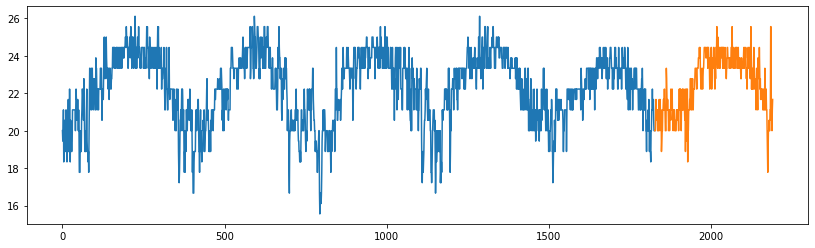

In [69]:
fig, ax = plt.subplots(figsize=(14,4))
ax.plot(x_train[:,0], y_train)
ax.plot(x_test[:,0],y_test)
plt.plot();

## Termini trigonometrici
Visto che gli estimators non hanno buone performances, provo a introdurre un termine trigonometrico

## Definizione dei k-fold della cross validation
`n_splits` è settato in modo tale da avere sempre il test set di dimensione 1.  

**Attenzione!** in questo modo non posso più usare lo scoring `r2` perchè ha bisogno di almeno 2 elementi nel test set!  
Devo usare ad esempio: `neg_mean_absolute_error`, `neg_mean_squared_error`

In [61]:
from sklearn.model_selection import TimeSeriesSplit
# Cross validation folds
tss = TimeSeriesSplit(n_splits=x_train.shape[0]-1)

## Regression

In [64]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import make_pipeline, Pipeline

In [65]:
# Linear regression

# Pipeline
steps = [
    ('norm', StandardScaler()),
    ('reg', LinearRegression())
]
lreg = Pipeline(steps)

param_grid = {
    'reg__fit_intercept': [True, False]
}

# Gridsearch
gs = GridSearchCV(lreg, param_grid, cv=tss, scoring='neg_mean_squared_error', refit=True, n_jobs=-1, iid=True)
gs.fit(x_train, y_train)
print(gs.best_score_)
print(gs.best_params_)
print()

#Best model
y_p = gs.predict(x_test)

print('Linear regression:')
print(my_regression_report(y_test,y_p,x_train))
print()

-84.06761428155677
{'reg__fit_intercept': True}

Linear regression:
R2: 0.00
R2 adjusted: -0.00
MAE: 0.07
MSE: 0.00



In [226]:
# Polinomial regression + cross validation
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Pipeline
steps = [
    
]
reg_pipeline = make_pipeline(PolynomialFeatures(), LinearRegression())

# Parameters grid
param_grid = {
    'polynomialfeatures__degree': range(3),
    'linearregression__fit_intercept': [True, False]
}

# Gridsearch
gs = GridSearchCV(reg_pipeline, param_grid, scoring='neg_mean_squared_error', cv=tss, n_jobs=-1, iid=True)
gs.fit(x_train, y_train)
print(gs.best_params_)
print()

# Best estimator
est = gs.best_estimator_
est.fit(x_train, y_train)
y_p = est.predict(x_test)

print('Polynomial regression:')
print(my_regression_report(y_test,y_p,x_train))
print()

{'linearregression__fit_intercept': True, 'polynomialfeatures__degree': 0}

Polynomial regression:
R2: -0.03
R2 adjusted: -0.03
MAE: 1.33
MSE: 2.41



In [227]:
from sklearn.linear_model import Ridge
# Ridge regression
# Pipeline
reg_pipeline = make_pipeline(PolynomialFeatures(), Ridge())

# Parameters grid
param_grid = {
    'polynomialfeatures__degree': range(3),
    'ridge__alpha': [0.1, 0.2, 0.5, 1, 10],
    'ridge__fit_intercept': [True, False]

}

# Gridsearch
gs = GridSearchCV(reg_pipeline, param_grid, scoring='neg_mean_squared_error', cv=tss, n_jobs=-1, iid=True)
gs.fit(x_train, y_train)
print(gs.best_params_)
print()

# Best estimator
est = gs.best_estimator_
est.fit(x_train, y_train)
y_p = est.predict(x_test)

print('Ridge regression:')
print(my_regression_report(y_test,y_p,x_train))
print()

{'polynomialfeatures__degree': 1, 'ridge__alpha': 10, 'ridge__fit_intercept': True}

Ridge regression:
R2: 0.04
R2 adjusted: 0.04
MAE: 1.22
MSE: 2.24



In [228]:
from sklearn.linear_model import RidgeCV
# Nota: non ha senso fare la cross validation di ridgeCV perchè sarebbe come farla 2 volte
ridgecv = RidgeCV(cv=tss, scoring='neg_mean_squared_error')
ridgecv.fit(x_train,y_train)
y_p = ridgecv.predict(x_test)

print(ridgecv.alpha_)
print()
print('RidgeCV regression:')
print(my_regression_report(y_test,y_p,x_train))
print()

10.0

RidgeCV regression:
R2: 0.04
R2 adjusted: 0.04
MAE: 1.22
MSE: 2.24



In [229]:
from sklearn.linear_model import Lasso
# Lasso regression
# Pipeline
reg_pipeline = make_pipeline(PolynomialFeatures(), Lasso())

# Parameters grid
param_grid = {
    'polynomialfeatures__degree': range(3),
    'lasso__alpha': [0.1, 0.2, 0.5, 1, 10],
    'lasso__fit_intercept': [True, False]

}

# Gridsearch
gs = GridSearchCV(reg_pipeline, param_grid, scoring='neg_mean_squared_error', cv=tss, n_jobs=-1, iid=True)
gs.fit(x_train, y_train)
print(gs.best_params_)
print()

# Best estimator
est = gs.best_estimator_
est.fit(x_train, y_train)
y_p = est.predict(x_test)

print('Lasso regression:')
print(my_regression_report(y_test,y_p,x_train))
print()

{'lasso__alpha': 0.2, 'lasso__fit_intercept': True, 'polynomialfeatures__degree': 2}

Lasso regression:
R2: 0.48
R2 adjusted: 0.47
MAE: 0.86
MSE: 1.23



C:\Users\mette\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1537.4956632005053, tolerance: 0.6220324945327317
  positive)
C:\Users\mette\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1537.4956632005053, tolerance: 0.6220324945327317
  positive)


## Other regressors

## Definizione dei k-fold della cross validation
`n_splits` è settato in modo tale da avere k-fold più grandi:.

In [910]:
# Cross validation folds
tss = TimeSeriesSplit(n_splits=5)

## Normalization

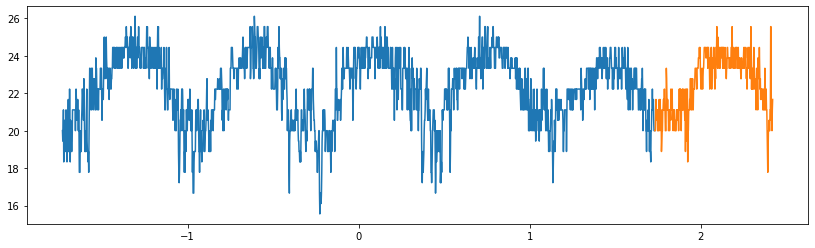

In [86]:
from sklearn.preprocessing import StandardScaler

z_scaler = StandardScaler()
x_train = z_scaler.fit_transform(x_train)
x_test = z_scaler.transform(x_test)

fig, ax = plt.subplots(figsize=(14,4))
ax.plot(x_train[:,0], y_train)
ax.plot(x_test[:,0],y_test)
plt.plot();

In [ ]:
from sklearn.neural_network import MLPRegressor
# MLPR (neural net)
reg = MLPRegressor(random_state=17, max_iter=100000)
# Parameters grid
param_grid = {
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'solver': ['lbfgs', 'sgd', 'adam'],
    'learning_rate': ['constant', 'invscaling', 'adaptive']
}

# Gridsearch
gs = GridSearchCV(reg, param_grid, scoring='neg_mean_squared_error', cv=tss, n_jobs=-1, iid=True)
gs.fit(x_train, y_train)
print(gs.best_params_)
print()

# Best estimator
est = gs.best_estimator_
est.fit(x_train, y_train)
y_p = est.predict(x_test)

print('Multi-layer Perceptron regressor:')
print(my_regression_report(y_test,y_p,x_train))
print()

In [913]:
# SVR
reg = SVR(gamma='auto')
# Parameters grid
param_grid = {
    'kernel': ['rbf', 'linear', 'poly', 'sigmoid'],
    'C': [1, 3, 5, 7, 9],
    'shrinking':[True, False],
    'epsilon':[0.1,0.3,0.5,0.7]
}

# Gridsearch
gs = GridSearchCV(reg, param_grid, scoring='neg_mean_squared_error', cv=tss, n_jobs=-1, iid=True)
gs.fit(x_train, y_train)
print(gs.best_params_)
print()

# Best estimator
est = gs.best_estimator_
est.fit(x_train, y_train)
y_p = est.predict(x_test)

print('Epsilon-Support Vector Regression:')
print(my_regression_report(y_test,y_p,x_train))
print()

{'C': 9, 'epsilon': 0.7, 'kernel': 'poly', 'shrinking': False}

Epsilon-Support Vector Regression:
R2: -0.01
R2 adjusted: -0.01
MAE: 1.30
MSE: 2.36



In [ ]:
# Random forest
reg = RandomForestRegressor(n_estimators=100, random_state=17)
# Parameters grid
param_grid = {
    'criterion': ['mae', 'mse'],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 4, 8]
}

# Gridsearch
gs = GridSearchCV(reg, param_grid, scoring='neg_mean_squared_error', cv=tss, n_jobs=-1, iid=True)
gs.fit(x_train, y_train)
print(gs.best_params_)
print()

# Best estimator
est = RandomForestRegressor(n_estimators=500, random_state=17, **gs.best_params_)
est.fit(x_train, y_train)
y_p = est.predict(x_test)

print('RandomForest Regression:')
print(my_regression_report(y_test,y_p,x_train))
print()

# Preprocessing 3

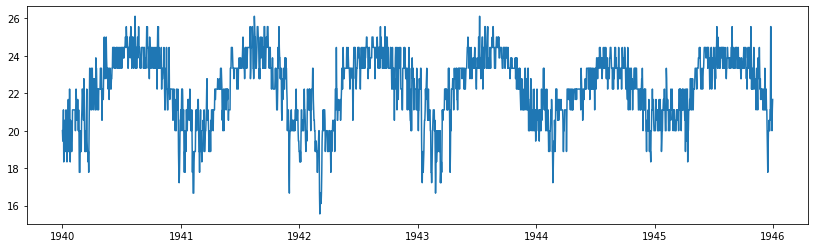

In [18]:
fig, ax = plt.subplots(figsize=(14,4))

ax.plot(date, mean_temp);

## Costruzione del dataset
Quello che voglio è un dataset costruito solo sulla base della variabile `mean_temp` che viene 'reshapata' in una matrice dove le righe sono slidign windows.  
### Train e test 
L'unico modo sensato di dividere è sulla linea temporale: fino al 31 dicembre 1944 è train set, dopo è test set.

In [19]:
from sklearn.model_selection import TimeSeriesSplit

w = 100
x_train, x_test, y_train, y_test = np.array([]), np.array([]), np.array([]),np.array([])
tss = TimeSeriesSplit(n_splits=mean_temp.shape[0]-1, max_train_size=w)

i = 0
for x_ids, y_ids in tss.split(mean_temp):
    if x_ids.size == w:
        if date[i] < np.datetime64('1945-01-01'):
            x_train = np.vstack((x_train, mean_temp[x_ids])) if x_train.size > 0 else mean_temp[x_ids]
            y_train = np.append(y_train, mean_temp[y_ids]) if y_train.size > 0 else mean_temp[y_ids]
        else:
            x_test = np.vstack((x_test, mean_temp[x_ids])) if x_test.size > 0 else mean_temp[x_ids]
            y_test = np.append(y_test, mean_temp[y_ids]) if y_test.size > 0 else mean_temp[y_ids]
    i += 1

In [20]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1728, 100), (364, 100), (1728,), (364,))

In [21]:
X = np.vstack((x_train,x_test))
y = np.append(y_train,y_test)
X.shape, y.shape

((2092, 100), (2092,))

# Regression
Per ciascun regressore ci sono due modi di valutazione:
- Cross validation (cross_val_predict): comporta l'esecuzione di una cross validation annidata che ovviemente è più pesante da calcolare. Ho notato che calcola (come mi aspettavo) **metriche meno ottimistiche**. Il difetto è che da questa tecnica non posso estrarre i best_params_ da gridsearch, ma sicuramente ho una visione più generalizzata dell'algoritmo.
- Il classico train e test. Pro e contro speculari rispetto all'altro approccio.  

Devo tenere conto della differenza tra le metriche.

In [23]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV, cross_val_predict, cross_val_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

In [203]:
print('Linear regression:')

# Pipeline
steps = [
#     ('norm', MinMaxScaler()), #Non richiede normalization
    ('reg', LinearRegression())
]
lreg = Pipeline(steps)

param_grid = {
    'reg__fit_intercept': [True, False]
}

# Gridsearch
gs = GridSearchCV(lreg, param_grid, cv=5, scoring='r2', refit=True, n_jobs=-1, iid=True)

# Se il training è veloce posso fare così(ottengo delle metriche più complete -> nested CV):
y_p = cross_val_predict(gs,X,y,cv=5,n_jobs=-1)
print(my_regression_report(y,y_p,X))

# Se il training è lento faccio solo
# gs.fit(x_train, y_train) #Con refit attivo
# print(gs.best_params_)
# print()
# y_p = gs.predict(x_test)
# print(my_regression_report(y_test,y_p,x_train))

print()

Linear regression:
R2: 0.76
R2 adjusted: 0.75
MAE: 0.65
MSE: 0.73



In [186]:
print('Polynomial regression:')

# Pipeline
steps = [
    #('norm', StandardScaler()),
    ('poly', PolynomialFeatures()),
    ('reg', LinearRegression())
]
preg = Pipeline(steps)

# Grid search
param_grid = {
    'poly__degree': range(3),
    'reg__fit_intercept': [True, False]
}
gs = GridSearchCV(preg, param_grid, cv=5, scoring='r2', refit=True, n_jobs=-1)

# Se il training è veloce posso fare così(ottengo delle metriche più complete -> nested CV):
y_p = cross_val_predict(gs,X,y,cv=5,n_jobs=-1)
print(my_regression_report(y,y_p,X))

# Se il training è lento faccio solo
# gs.fit(x_train, y_train) #Con refit attivo
# print(gs.best_params_)
# print()
# y_p = gs.predict(x_test)
# print(my_regression_report(y_test,y_p,x_train))

print()

Polynomial regression:
R2: 0.76
R2 adjusted: 0.75
MAE: 0.65
MSE: 0.73



In [189]:
print('Ridge regression:')

# Pipeline
steps = [
    ('poly', PolynomialFeatures()),
    ('ridge', Ridge())
]
ridge = Pipeline(steps)

# Parameters grid
param_grid = {
    'poly__degree': range(3),
    'ridge__alpha': [0.1, 0.2, 0.5, 1, 10],
    'ridge__fit_intercept': [True, False]
}

# Gridsearch
gs = GridSearchCV(ridge, param_grid, scoring='r2', cv=5, refit=True, n_jobs=-1, iid=True)

# Se il training è veloce posso fare così(ottengo delle metriche più complete -> nested CV):
y_p = cross_val_predict(gs,X,y,cv=5,n_jobs=-1)
print(my_regression_report(y,y_p,X))

# Se il training è lento faccio solo
# gs.fit(x_train, y_train) #Con refit attivo
# print(gs.best_params_)
# print()
# y_p = gs.predict(x_test)
# print(my_regression_report(y_test,y_p,x_train))
print()

Ridge regression:
R2: 0.77
R2 adjusted: 0.75
MAE: 0.65
MSE: 0.73



In [190]:
print('Lasso regression:')

# Pipeline
steps = [
    ('poly', PolynomialFeatures()),
    ('lasso', Lasso())
]
ridge = Pipeline(steps)

# Parameters grid
param_grid = {
    'poly__degree': range(3),
    'lasso__alpha': [0.1, 0.2, 0.5, 1, 10],
    'lasso__fit_intercept': [True, False]

}

# Gridsearch
gs = GridSearchCV(ridge, param_grid, scoring='r2', cv=5, refit=True, n_jobs=-1, iid=True)

# Se il training è veloce posso fare così(ottengo delle metriche più complete -> nested CV):
y_p = cross_val_predict(gs,X,y,cv=5,n_jobs=-1)
print(my_regression_report(y,y_p,X))

# Se il training è lento faccio solo
# gs.fit(x_train, y_train) #Con refit attivo
# print(gs.best_params_)
# print()
# y_p = gs.predict(x_test)
# print(my_regression_report(y_test,y_p,x_train))
print()

Lasso regression:
R2: 0.78
R2 adjusted: 0.76
MAE: 0.64
MSE: 0.70



In [204]:
# MLPR (neural net)
print('Multi-layer Perceptron regressor:')

# Pipeline
steps = [
    ('norm', StandardScaler()), #meglio del minmax
    ('reg', MLPRegressor(random_state=17, max_iter=10000))
]
mlpreg = Pipeline(steps)

# Parameters grid
param_grid = {
    'reg__activation': ['identity', 'logistic', 'tanh', 'relu'],
    'reg__solver': ['lbfgs', 'sgd', 'adam']#,
    #'learning_rate': ['constant', 'invscaling', 'adaptive']
}

# Gridsearch
gs = GridSearchCV(mlpreg, param_grid, scoring='r2', cv=5, refit=True, n_jobs=-1, iid=True)

# Se il training è veloce posso fare così(ottengo delle metriche più complete -> nested CV):
# y_p = cross_val_predict(gs,X,y,cv=5,n_jobs=-1)
# print(my_regression_report(y,y_p,X))

# Se il training è lento faccio solo:
gs.fit(x_train, y_train) #Con refit attivo
print(gs.best_params_)
print()
y_p = gs.predict(x_test)
print(my_regression_report(y_test,y_p,x_train))

print()

Multi-layer Perceptron regressor:
{'reg__activation': 'relu', 'reg__solver': 'sgd'}

R2: 0.67
R2 adjusted: 0.65
MAE: 0.65
MSE: 0.76



In [206]:
# SVR
print('Epsilon-Support Vector Regression:')

# Pipeline
steps = [
    ('norm', StandardScaler()),
    ('reg', SVR(gamma='auto'))
]
svr = Pipeline(steps)

# Parameters grid
param_grid = {
    'reg__kernel': ['rbf', 'linear', 'poly', 'sigmoid'],
    'reg__C': [1, 3, 5, 7, 9],
    'reg__shrinking':[True, False],
    'reg__epsilon':[0.1,0.3,0.5,0.7]
}

# Gridsearch
gs = GridSearchCV(svr, param_grid, scoring='r2', cv=5, refit=True, n_jobs=-1, iid=True)

# Se il training è veloce posso fare così(ottengo delle metriche più complete -> nested CV):
# y_p = cross_val_predict(gs,X,y,cv=5,n_jobs=-1)
# print(my_regression_report(y,y_p,X))

# Se il training è lento faccio solo:
gs.fit(x_train, y_train) #Con refit attivo
print(gs.best_params_)
print()
y_p = gs.predict(x_test)
print(my_regression_report(y_test,y_p,x_train))
print()

Epsilon-Support Vector Regression:
{'reg__C': 1, 'reg__epsilon': 0.1, 'reg__kernel': 'linear', 'reg__shrinking': False}

R2: 0.68
R2 adjusted: 0.66
MAE: 0.64
MSE: 0.75



In [26]:
print('RandomForest Regression:')

# Pipeline
steps = [
    ('norm', StandardScaler()),
    ('reg', RandomForestRegressor(n_estimators=100, random_state=17))
]
rf = Pipeline(steps)

# Parameters grid
param_grid = {
    #'reg__criterion': ['mae', 'mse'],
    #'reg__min_samples_split': [2, 4, 6]
}

# Gridsearch
gs = GridSearchCV(rf, param_grid, scoring='r2', cv=5, refit=True, n_jobs=-1, iid=True)

# Se il training è veloce posso fare così(ottengo delle metriche più complete -> nested CV):
# y_p = cross_val_predict(gs,X,y,cv=5,n_jobs=-1)
# print(my_regression_report(y,y_p,X))

# Se il training è lento faccio solo:
gs.fit(x_train, y_train) #Con refit attivo
print(gs.best_params_)
print()
y_p = gs.predict(x_test)
print(my_regression_report(y_test,y_p,x_train))
print()

RandomForest Regression:
{}

R2: 0.70
R2 adjusted: 0.68
MAE: 0.64
MSE: 0.71



# Previsione del best regressor

In [221]:
import matplotlib.pyplot as plt

# Il best estimator è Lasso, ma è lento, quindi uso Ridge che è praticamente uguale
# Pipeline
steps = [
    ('poly', PolynomialFeatures()),
    ('ridge', Ridge())
]
ridge = Pipeline(steps)

# Parameters grid
param_grid = {
    'poly__degree': range(3),
    'ridge__alpha': [0.1, 0.2, 0.5, 1, 10],
    'ridge__fit_intercept': [True, False]
}

# Gridsearch
gs = GridSearchCV(ridge, param_grid, scoring='r2', cv=5, refit=True, n_jobs=-1, iid=True)

# Se il training è veloce posso fare così(ottengo delle metriche più complete -> nested CV):
y_p = cross_val_predict(gs,X,y,cv=5,n_jobs=-1)

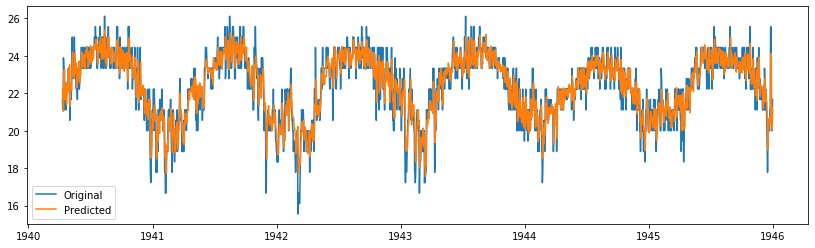

In [222]:
# Plot
fig, ax = plt.subplots(figsize=(14,4))
ax.plot(date[w:], y, label='Original')
ax.plot(date[w:], y_p, label='Predicted')
ax.legend()
plt.plot();

# Further steps to improve the prediction
Prova a variare il valore di w. Un'idea potrebbe essere quella di fare il tuning di w sulla linear regression e poi provarlo su tutti. Avrei dovuto farlo a monte...